<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/AI-sang-thu-7/blob/main/AI_W9_31_03_2023_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

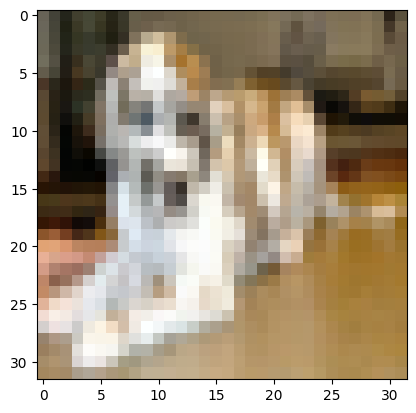

Số: [[[104  99  87]
  [ 67  66  56]
  [ 36  37  27]
  ...
  [117 105  80]
  [ 44  35  24]
  [ 90  81  61]]

 [[106 102  90]
  [ 70  69  57]
  [ 32  33  20]
  ...
  [123 109  81]
  [ 68  55  40]
  [112  98  74]]

 [[107 104  89]
  [ 73  71  58]
  [ 34  36  24]
  ...
  [124 109  80]
  [ 89  74  55]
  [107  91  70]]

 ...

 [[154 127  95]
  [163 138 106]
  [168 146 119]
  ...
  [174 139  73]
  [173 135  67]
  [172 134  63]]

 [[166 141 105]
  [175 148 111]
  [170 148 119]
  ...
  [176 140  81]
  [176 140  80]
  [168 135  74]]

 [[164 136  95]
  [168 140 101]
  [164 138 104]
  ...
  [181 145  90]
  [176 145  94]
  [172 141  88]]]


In [ ]:
digit=x_train[1111]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('Số:',x_train[1111])

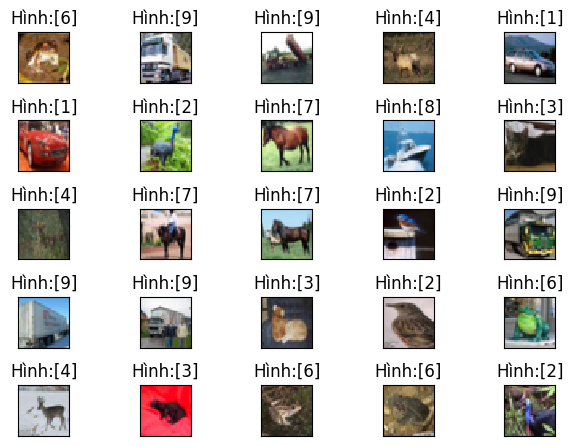

In [ ]:
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.tight_layout()
   plt.imshow(x_train[i],cmap='gray',interpolation='none')
   plt.title('Hình:{}'.format(y_train[i]))
   plt.xticks([])
   plt.yticks([])

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(3000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x=x_train
y=y_train

In [ ]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
391/391 [==============================] - 121s 308ms/step - loss: 2.2601 - accuracy: 0.2453
Epoch 2/10
391/391 [==============================] - 117s 299ms/step - loss: 1.8109 - accuracy: 0.3469
Epoch 3/10
391/391 [==============================] - 117s 300ms/step - loss: 1.7073 - accuracy: 0.3867
Epoch 4/10
391/391 [==============================] - 113s 289ms/step - loss: 1.6364 - accuracy: 0.4129
Epoch 5/10
391/391 [==============================] - 113s 288ms/step - loss: 1.5823 - accuracy: 0.4315
Epoch 6/10
391/391 [==============================] - 124s 318ms/step - loss: 1.5402 - accuracy: 0.4493
Epoch 7/10
391/391 [==============================] - 135s 347ms/step - loss: 1.4944 - accuracy: 0.4616
Epoch 8/10
391/391 [==============================] - 132s 337ms/step - loss: 1.4564 - accuracy: 0.4801
Epoch 9/10
391/391 [==============================] - 141s 360ms/step - loss: 1.4166 - accuracy: 0.4911
Epoch 10/10
313/313 [==============================] - 10s 32ms/

In [ ]:
model.save('test1.h5')

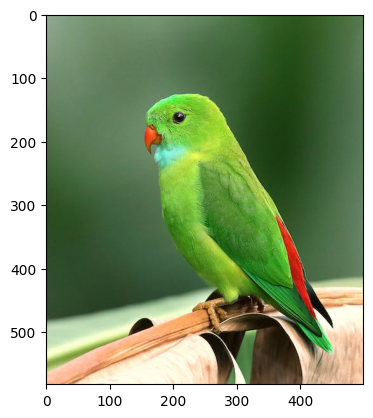

In [ ]:
img=plt.imread('/content/drive/MyDrive/Bird.jpeg')
plt.imshow(img)


1/1 [==============================] - 0s 188ms/step


array([9])

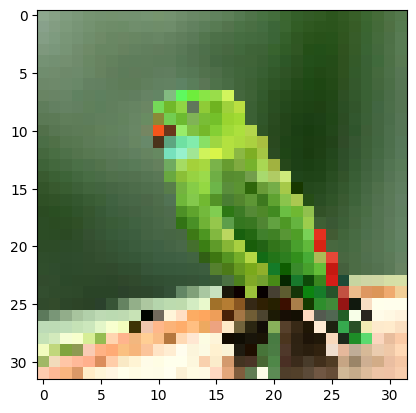

In [5]:
import numpy as np
from keras.utils import load_img,img_to_array
img=load_img('/content/drive/MyDrive/Bird.jpeg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)